In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# AI Agents for Engineers (Evolution of AI Agents)

<a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/ai_agents_for_engineers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

| | |
|-|-|
| Author(s) | [Kristopher Overholt](https://github.com/koverholt) [Holt Skinner](https://github.com/holtskinner)|

## Overview

This notebook demonstrates 3 different approaches to generating essays using the [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs). Each method illustrates a distinct paradigm for running AI Agents in differing levels of complexity.

1. Zero-Shot Approach with the Gemini API
2. Step-by-Step Approach With LangChain
3. Iterative, AI-Agent Approach with LangGraph

## Get started

### Install Gemini SDK and other required packages


In [1]:
%pip install --upgrade --quiet \
    google-genai \
    langgraph \
    langchain \
    langchain-google-genai \
    langchain-google-vertexai \
    langchain-community \
    tavily-python \
    pydantic

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Configure API keys

Get API keys from [Google AI Studio](https://ai.google.dev/gemini-api/docs/api-key) and [Tavily](https://tavily.com/).

In [1]:
#Comment out since API keys stored as secrets and are stored and used in next cell
#import os

#os.environ["GOOGLE_API_KEY"] = "."
#os.environ["TAVILY_API_KEY"] = "."

In [3]:
# If your API Keys are in Colab Secrets
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

Create a client to make API calls.

In [4]:
from google import genai

client = genai.Client(api_key=os.environ["GOOGLE_API_KEY"])

## Generating Essays Using a Zero-Shot Approach with the Gemini API

With just a single call to the `generate_content` method, users can create detailed, structured essays on any topic by leveraging state-of-the-art language models such as Gemini 1.5 Pro or Gemini 1.5 Flash.

<img src="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/1-prompt-essay.png?raw=1" width="350px">

### Import libraries

In [5]:
from IPython.display import Markdown, display

### Load model

In [6]:
#Use google ai - models option has dropdown with other model options available to use here
MODEL_ID = "gemini-2.0-flash-001"

### Make an API call to generate the essay

In [7]:
prompt = "Write a 3-paragraph essay about the application of heat transfer in modern data centers"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

Heat transfer is a critical consideration in the design and operation of modern data centers, which house densely packed electronic components that generate significant amounts of heat. Effective heat management is paramount to ensuring the reliability, efficiency, and longevity of these facilities. Various heat transfer mechanisms, including conduction, convection, and radiation, play vital roles in dissipating the generated heat and maintaining optimal operating temperatures. Utilizing sophisticated cooling systems that leverage these principles, such as liquid cooling and air cooling techniques with optimized airflow designs, is essential to prevent overheating, component failure, and performance degradation.

The application of heat transfer principles in data centers extends beyond simply removing heat; it also involves optimizing energy efficiency. Data centers consume a substantial amount of energy, and a significant portion of that energy is dedicated to cooling. Therefore, understanding and manipulating heat transfer processes allows for the implementation of innovative cooling solutions that reduce energy consumption and minimize the environmental impact. Free cooling techniques, which utilize natural environmental conditions like outside air or water sources, can significantly reduce the reliance on energy-intensive mechanical cooling systems. Furthermore, advancements in computational fluid dynamics (CFD) modeling allow engineers to simulate and optimize airflow patterns within data centers, ensuring efficient heat removal while minimizing fan power requirements.

Ultimately, the efficient management of heat transfer in data centers is a continuous process of innovation and optimization. As computational power and hardware density continue to increase, so too does the demand for more effective and energy-efficient cooling solutions. Ongoing research and development are focused on exploring novel heat transfer techniques, such as immersion cooling and phase change materials, that can provide even greater cooling capacity and energy savings. By embracing advancements in heat transfer technology and continuously refining cooling strategies, data centers can maintain optimal performance, extend equipment lifespan, and contribute to a more sustainable future.


---

However, what if we ask the model to write an essay about an event that happened more recently and the LLM doesn't inherently know about that event?

In [10]:
#When this was written the model hallucinated and didn't know what these hurricanes were. May now correctly answer if model has been re-trained
prompt = "Write a 3-paragraph essay about the impacts of Hurricane Helene and Hurricane Milton in 2024."
response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

In 2024, both Hurricane Helene and Hurricane Milton left indelible marks across different regions, highlighting the continued vulnerability of coastal communities to increasingly intense and erratic weather patterns. Hurricane Helene, striking the eastern seaboard of the United States, brought torrential rainfall and widespread flooding. Major cities faced transportation shutdowns as roadways became submerged, and coastal erosion threatened homes and businesses built near the shoreline. Beyond the immediate damage, the storm surge contaminated freshwater sources with saltwater, impacting agriculture and necessitating costly remediation efforts. The long-term economic consequences of Helene included disruptions to tourism and supply chains, further straining resources for recovery and rebuilding.

Hurricane Milton, in contrast, wreaked havoc on island nations in the Caribbean. The smaller landmasses offered less resistance to the powerful winds and storm surge, leading to catastrophic destruction of infrastructure. Homes were flattened, communication networks were severed, and access to clean water and medical supplies became severely limited. The agricultural sector, a vital source of income and sustenance for these islands, was particularly hard hit with crops destroyed and livestock lost. The psychological impact on residents, already grappling with the threat of climate change, was significant, with many facing displacement and uncertainty about the future.

The dual impacts of Hurricanes Helene and Milton in 2024 served as a stark reminder of the escalating challenges posed by extreme weather events. They underscored the need for proactive mitigation strategies, including enhanced infrastructure, robust emergency response systems, and a global commitment to addressing climate change. Furthermore, the disproportionate impact on vulnerable communities, particularly in the Caribbean, emphasized the importance of international cooperation and financial assistance to support resilience and adaptation efforts, ensuring that all nations can better withstand the increasing frequency and intensity of future hurricanes.


In this case, the model had no information about these recent events and was unable to write an effective essay.

## Generating Essays Using a Step-by-Step Approach With LangChain

This step demonstrates how to build an essay-writing pipeline using [LangChain](https://www.langchain.com/), the [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs), and [Tavily](https://tavily.com/) for search.

By combining these tools, we create a seamless workflow that plans an essay outline, performs web searches for relevant information, and generates a complete essay draft based on the collected data.

This solution showcases the power of chaining LLM models and external tools to tackle complex tasks with minimal human intervention, providing a robust approach to automated content generation.

<img src="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/2-langchain-essay.png?raw=1" width="550px">


### Import libraries

In [11]:
from IPython.display import Markdown, display
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain_community.tools import TavilySearchResults
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI

### Initialize Gemini model & search tool

In [13]:
model = ChatGoogleGenerativeAI(model=MODEL_ID, temperature=0)
tavily_tool = TavilySearchResults(max_results=5)

### Define prompt templates and Runnables

In [14]:
# Planning: Create an outline for the essay
outline_template = ChatPromptTemplate.from_template(
    "Create a detailed outline for an essay on {topic}"
)


# Research: Web search
def research_fn(topic):
    response = tavily_tool.invoke({"query": topic})
    return "\n".join([f"- {result['content']}" for result in response])


# Writing: Write the essay based on outline and research
writing_template = ChatPromptTemplate.from_template(
    "Based on the following outline and research, write a 3-paragraph essay on '{topic}':\n\nOutline:\n{outline}\n\nResearch:\n{research}\n\nEssay:"
)

### Define the Runnable Chain using [LangChain Expression Language (LCEL)](https://python.langchain.com/docs/how_to/#langchain-expression-language-lcel)

In [15]:
# Define individual chains
outline_chain = LLMChain(llm=model, prompt=outline_template)
writing_chain = LLMChain(llm=model, prompt=writing_template)

# Use the pipe operator to combine chains
chain = (
    outline_chain
    | (
        lambda result: {
            "topic": result["topic"],
            "outline": result["text"],
            "research": research_fn(result["topic"]),
        }
    )
    | writing_chain
    | (lambda result: result["text"])  # Extract the essay text from the final result
    | StrOutputParser()
)

<ipython-input-15-85f168a8c6b1>:2: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  outline_chain = LLMChain(llm=model, prompt=outline_template)


### Generate the essay

In [16]:
essay = chain.invoke({"topic": prompt})
display(Markdown(essay))

The Atlantic hurricane season is a constant reminder of nature's raw power, and in 2024, the hypothetical storms Helene and Milton served as stark examples of the potential for widespread disruption and damage. While hypothetical, Hurricanes Helene and Milton, projected as Category 2 and Category 3 storms respectively, presented significant challenges during the 2024 hurricane season. Their potential impacts, though simulated, offer valuable insights into disaster preparedness and response. This essay will explore the potential impacts of Hurricanes Helene and Milton, focusing on the hypothetical consequences of environmental damage, and the disruption of critical infrastructure.

One of the most immediate and devastating potential consequences of Hurricanes Helene and Milton would be the widespread environmental damage. Within two weeks in late September and early October 2024, hurricanes Helene and Milton wreaked havoc across Florida, leaving significant environmental challenges in their wake. St. Petersburg’s overwhelmed infrastructure during Hurricane Helene resulted in the discharge of nearly 1.5 million gallons of untreated wastewater throughout the area, according to the Tampa Bay Times. The two most significant spills occurred at the Glendale Wastewater Reclamation Facility in southeast Lakeland, which has been in operation since 1926, and together accounted for five million gallons, according to reports filed to the Florida Department of Environmental Protection. Beyond the immediate threat of flooding, Hurricanes Helene and Milton could have also severely impacted critical infrastructure, further compounding the challenges faced by affected communities.

The hypothetical impact of Hurricanes Helene and Milton extends beyond immediate physical damage, potentially causing significant disruption to critical infrastructure. Hurricane Milton made landfall near Siesta Key, Florida, as a Category 3 storm on October 9, 2024. Milton was a Category 3 storm with sustained winds of 120 mph when it reached Florida. Hypothetically, power outages could have crippled major cities for days. The agricultural sector in Florida might have suffered significant losses due to crop damage.

In conclusion, while hypothetical, the scenarios presented by Hurricanes Helene and Milton in 2024 highlight the potential for devastating environmental damage and widespread infrastructure damage. The potential for environmental damage and the vulnerability of critical infrastructure to high winds and flooding underscore the importance of proactive disaster preparedness. As climate change continues to fuel more intense and frequent storms, the lessons learned from hypothetical events like Hurricanes Helene and Milton become increasingly vital for protecting communities and ensuring a more resilient future.

## Generating Essays Using an Iterative, AI-Agent Approach with LangGraph

This section demonstrates how to build a [LangGraph](https://langchain-ai.github.io/langgraph/)-powered AI agent to generate, revise, and critique essays using large language models such as Google's [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs) or the [Gemini API in Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview). The LangGraph code was adapted from the awesome DeepLearning.AI course on [AI Agents in LangGraph](https://www.deeplearning.ai/short-courses/ai-agents-in-langgraph/).

By defining a structured state flow with nodes such as "Planner," "Research Plan," "Generate," "Reflect," and "Research Critique," the system iteratively creates an essay on a given topic, incorporates feedback, and provides research-backed insights.

<img src="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/workshops/ai-agents/3-langgraph-essay.png?raw=1" width="900px">

The workflow enables automated essay generation with revision controls, making it ideal for structured writing tasks or educational use cases. Additionally, the notebook uses external search tools to gather and integrate real-time information into the essay content.

### Import libraries

In [17]:
from typing import TypedDict

# Common libraries
from IPython.display import Image, Markdown, display

# LangChain and LangGraph components
from langchain_core.messages import HumanMessage, SystemMessage

# LangChain integrations for Gemini API in Google AI Studio and Vertex AI
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph

# Typing utilities for data validation and schema definitions
from pydantic.v1 import BaseModel

# Tavily client for performing web searches
from tavily import TavilyClient

### Initialize agent memory, agent state, and schema for search queries

In [18]:
# Initialize agent memory
memory = MemorySaver()


# Define the agent's state
class AgentState(TypedDict):
    task: str
    plan: str
    draft: str
    critique: str
    content: list[str]
    revision_number: int
    max_revisions: int


# Define a schema for search queries
class Queries(BaseModel):
    """Variants of query to search for"""

    queries: list[str]

### Initialize Gemini model and search tool

Remember to set the environment variables `GOOGLE_API_KEY` and `TAVILY_API_KEY`. And configure credentials for Vertex AI if you switch to it.

In [19]:
# Initialize Gemini API in Google AI Studio via LangChain
model = ChatGoogleGenerativeAI(model=MODEL_ID, temperature=0)

# Initialize Gemini API in Vertex AI via LangChain
# model = ChatVertexAI(model="gemini-1.5-pro-002", temperature=0)

# Initialize Tavily client for performing web searches
tavily = TavilyClient()

### Define prompt templates for each stage

In [20]:
PLAN_PROMPT = """You are an expert writer tasked with writing a high level outline of an essay.
Write such an outline for the user provided topic. Give an outline of the essay along with any
relevant notes or instructions for the sections."""

WRITER_PROMPT = """You are an essay assistant tasked with writing excellent 3-paragraph essays.
Generate the best essay possible for the user's request and the initial outline.
If the user provides critique, respond with a revised version of your previous attempts.
Use Markdown formatting to specify a title and section headers for each paragraph.
Utilize all of the information below as needed:
---
{content}"""

REFLECTION_PROMPT = """You are a teacher grading an essay submission.
Generate critique and recommendations for the user's submission.
Provide detailed recommendations, including requests for length, depth, style, etc."""

RESEARCH_PLAN_PROMPT = """You are a researcher charged with providing information that can
be used when writing the following essay. Generate a list of search queries that will gather
any relevant information. Only generate 3 queries max."""

RESEARCH_CRITIQUE_PROMPT = """You are a researcher charged with providing information that can
be used when making any requested revisions (as outlined below).
Generate a list of search queries that will gather any relevant information.
Only generate 3 queries max."""

### Define node functions for each stage

In [21]:
# Generate an outline for the essay


def plan_node(state: AgentState):
    messages = [SystemMessage(content=PLAN_PROMPT), HumanMessage(content=state["task"])]
    response = model.invoke(messages)
    return {"plan": response.content}


# Conducts research based on the generated plan and web search results
def research_plan_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke(
        [
            SystemMessage(content=RESEARCH_PLAN_PROMPT),
            HumanMessage(content=state["task"]),
        ]
    )
    content = state["content"] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response["results"]:
            content.append(r["content"])
    return {"content": content}


# Generates a draft based on the content and plan
def generation_node(state: AgentState):
    content = "\n\n".join(state["content"] or [])
    user_message = HumanMessage(
        content=f"{state['task']}\n\nHere is my plan:\n\n{state['plan']}"
    )
    messages = [
        SystemMessage(content=WRITER_PROMPT.format(content=content)),
        user_message,
    ]
    response = model.invoke(messages)
    return {
        "draft": response.content,
        "revision_number": state.get("revision_number", 1) + 1,
    }


# Provides feedback or critique on the draft
def reflection_node(state: AgentState):
    messages = [
        SystemMessage(content=REFLECTION_PROMPT),
        HumanMessage(content=state["draft"]),
    ]
    response = model.invoke(messages)
    return {"critique": response.content}


# Conducts research based on the critique
def research_critique_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke(
        [
            SystemMessage(content=RESEARCH_CRITIQUE_PROMPT),
            HumanMessage(content=state["critique"]),
        ]
    )
    content = state["content"] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response["results"]:
            content.append(r["content"])
    return {"content": content}


# Determines whether the critique and research cycle should
# continue based on the number of revisions
def should_continue(state):
    if state["revision_number"] > state["max_revisions"]:
        return END
    return "reflect"

### Define and compile the graph

In [22]:
# Initialize the state graph
builder = StateGraph(AgentState)

# Add nodes for each step in the workflow
builder.add_node("planner", plan_node)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_node("research_plan", research_plan_node)
builder.add_node("research_critique", research_critique_node)

# Set the entry point of the workflow
builder.set_entry_point("planner")

# Add conditional edges for task continuation or end
builder.add_conditional_edges(
    "generate", should_continue, {END: END, "reflect": "reflect"}
)

# Define task sequence edges
builder.add_edge("planner", "research_plan")
builder.add_edge("research_plan", "generate")

builder.add_edge("reflect", "research_critique")
builder.add_edge("research_critique", "generate")

# Compile the graph with memory state management
graph = builder.compile(checkpointer=memory)

### Show the compiled graph

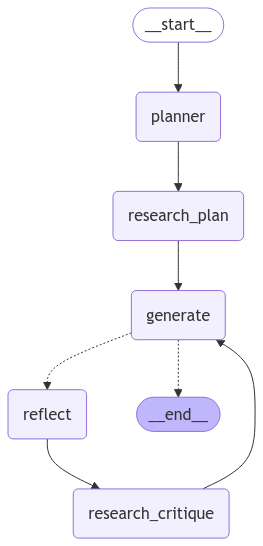

In [23]:
Image(graph.get_graph().draw_mermaid_png())

### Run the agent - write on!

In [24]:
# Define the topic of the essay
ESSAY_TOPIC = "What were the impacts of Hurricane Helene and Hurricane Milton in 2024?"

# Define a thread configuration with a unique thread ID
thread = {"configurable": {"thread_id": "1"}}

# Stream through the graph execution with an initial task and state
for s in graph.stream(
    {
        "task": ESSAY_TOPIC,  # Initial task
        "max_revisions": 2,  # Maximum number of revisions allowed
        "revision_number": 1,  # Current revision number
        "content": [],  # Initial empty content list
    },
    thread,
):
    step = next(iter(s))
    display(Markdown(f"# {step}"))
    for key, content in s[step].items():
        if key == "revision_number":
            display(Markdown(f"**Revision Number**: {content}"))
        elif isinstance(content, list):
            for c in content:
                display(Markdown(c))
        else:
            display(Markdown(content))
    print("\n---\n")

# planner

Okay, here's a high-level essay outline focusing on the hypothetical impacts of Hurricanes Helene and Milton in 2024.  Since these are hypothetical events, the essay will necessarily rely on projections, historical data from similar storms, and expert opinions on coastal vulnerability.

**Essay Title (Example):**  "Twin Storms, Tangled Destinies: Assessing the Hypothetical Impacts of Hurricanes Helene and Milton in 2024"

**I. Introduction**

*   **Hook:** Start with a compelling, albeit hypothetical, scenario.  Example: "Imagine the news headlines: 'Helene Slams the Carolinas, Milton Batters the Gulf Coast.' While hypothetical, the potential impacts of two such storms in a single season offer a crucial lens through which to examine coastal vulnerability and disaster preparedness."
*   **Background:** Briefly introduce the concept of hurricane seasons, the increasing intensity of storms (mention climate change as a contributing factor, but don't make it the sole focus), and the importance of studying potential impacts.
*   **Thesis Statement:**  Clearly state the essay's main argument.  Example: "While hypothetical, the projected impacts of Hurricanes Helene and Milton in 2024 highlight the diverse vulnerabilities of the Atlantic and Gulf coasts, demanding a comprehensive approach to mitigation, preparedness, and resilient rebuilding strategies."

**II. Hurricane Helene: A Hypothetical Atlantic Impact**

*   **A. Projected Path and Intensity:**
    *   Based on historical hurricane tracks and climate models, hypothesize a likely path for Helene.  Perhaps a Carolinas landfall, or a brush with the Outer Banks.
    *   Assign a hypothetical category (e.g., Category 3) and wind speed.  Justify this based on historical data of similar storms in the region.
    *   Mention the potential for storm surge, heavy rainfall, and inland flooding.
*   **B. Potential Impacts on Coastal Communities:**
    *   **Economic Impacts:** Discuss potential damage to tourism, fishing industries, and agriculture.  Quantify these with hypothetical figures (e.g., "billions of dollars in damage").
    *   **Infrastructure Impacts:**  Assess the vulnerability of roads, bridges, power grids, and water systems.  Mention potential for widespread power outages.
    *   **Environmental Impacts:**  Discuss beach erosion, damage to coastal ecosystems (salt marshes, mangroves), and potential for saltwater intrusion into freshwater sources.
*   **C. Social Impacts:**
    *   Displacement of residents, potential for injuries and fatalities.
    *   Strain on emergency services and healthcare systems.
    *   Psychological impacts of the storm on affected communities.

**III. Hurricane Milton: A Hypothetical Gulf Coast Impact**

*   **A. Projected Path and Intensity:**
    *   Hypothesize a likely path for Milton, perhaps a landfall in Florida, Louisiana, or Texas.
    *   Assign a hypothetical category and wind speed, justifying it based on historical data.
    *   Emphasize the potential for storm surge in the Gulf Coast's shallow waters.
*   **B. Potential Impacts on Coastal Communities:**
    *   **Economic Impacts:** Focus on the oil and gas industry, tourism, and fisheries.  Discuss potential disruptions to energy production and supply chains.
    *   **Infrastructure Impacts:**  Assess the vulnerability of coastal refineries, ports, and transportation networks.
    *   **Environmental Impacts:**  Discuss damage to wetlands, coral reefs, and the potential for oil spills.
*   **C. Social Impacts:**
    *   Similar to Helene, discuss displacement, injuries, fatalities, and strain on resources.
    *   Consider the unique challenges faced by vulnerable populations in the Gulf Coast region (e.g., low-income communities, elderly residents).

**IV. Comparative Analysis: Helene vs. Milton**

*   **A. Similarities:**
    *   Both storms would cause significant economic damage, infrastructure disruption, and social hardship.
    *   Both would highlight the need for improved disaster preparedness and resilient infrastructure.
*   **B. Differences:**
    *   Different economic sectors would be affected (tourism vs. oil & gas).
    *   The nature of the environmental impacts would vary (beach erosion vs. oil spills).
    *   The specific vulnerabilities of the coastal communities would differ.
*   **C. Lessons Learned:**
    *   What can be learned from comparing these hypothetical scenarios?
    *   How can these lessons inform future disaster planning and mitigation efforts?

**V. Mitigation, Preparedness, and Resilience**

*   **A. Mitigation Strategies:**
    *   Discuss long-term strategies to reduce the risk of hurricane damage, such as coastal restoration, building codes, and land-use planning.
    *   Briefly touch on the role of climate change mitigation in reducing the intensity of future storms.
*   **B. Preparedness Measures:**
    *   Emphasize the importance of early warning systems, evacuation plans, and community education.
    *   Discuss the role of government agencies, non-profit organizations, and individual citizens in preparing for hurricanes.
*   **C. Resilient Rebuilding:**
    *   Advocate for rebuilding infrastructure in a way that is more resistant to future storms.
    *   Promote the use of green infrastructure and nature-based solutions.

**VI. Conclusion**

*   **Restate Thesis:** Reiterate the main argument of the essay.
*   **Summarize Key Points:** Briefly summarize the potential impacts of Hurricanes Helene and Milton and the importance of mitigation, preparedness, and resilience.
*   **Concluding Statement:** End with a call to action or a thought-provoking statement about the future of coastal communities in the face of increasing hurricane risk.  Example: "The hypothetical scenarios of Hurricanes Helene and Milton serve as a stark reminder that proactive measures are essential to protect coastal communities and ensure a more resilient future in the face of increasingly intense storms."

**Important Notes:**

*   **Hypothetical Nature:**  Emphasize throughout the essay that these are hypothetical scenarios. Use phrases like "projected impacts," "potential consequences," and "if such a storm were to occur."
*   **Data and Sources:**  Even though the events are hypothetical, ground your analysis in real-world data.  Use historical hurricane tracks, climate models, vulnerability assessments, and expert opinions to support your claims. Cite your sources appropriately.
*   **Balance:**  Maintain a balanced tone.  Avoid sensationalism or alarmism.  Focus on providing a realistic and informative assessment of the potential impacts.
*   **Specificity:**  Be as specific as possible when discussing potential impacts.  Instead of saying "the economy would be affected," say "the tourism industry in coastal North Carolina could suffer significant losses due to beach erosion and damage to hotels."
*   **Visual Aids (Optional):** Consider including maps showing hypothetical storm tracks or charts illustrating potential economic losses.

Good luck! Let me know if you'd like me to elaborate on any of these sections.


---



# research_plan

North Carolina was severely impacted by Hurricane Helene during late September 2024, primarily in its western Appalachian region, causing at least 105 reported deaths and significant destruction of infrastructure and residential areas across several settlements.[1] After making landfall in the Big Bend region of Florida on September 27, the hurricane began to traverse over land across Georgia as a Category 2 hurricane and into the Appalachian mountain range as a tropical storm, depositing record-breaking amounts of rainfall across several settlements in western North Carolina, such as Asheville, Swannanoa, Spruce Pine, Chimney Rock, Montreat, Lake Lure, and several others. Of the 241 people reported victims of Hurricane Helene in the United States, 119 people were in North Carolina, surpassing the state record of 80 deaths recorded in a 1916 flood.[8][35] Of these, 72 residents of Buncombe County were among the deceased.

Ask the Chatbot Games & Quizzes History & Society Science & Tech Biographies Animals & Nature Geography & Travel Arts & Culture ProCon Money Videos Hurricane Helene, large, catastrophic tropical cyclone notable for its rapid intensification that ultimately produced a wide swath of damage and loss of life that extended from northwestern Florida, where the storm made landfall on September 26, 2024, to Tennessee, Georgia, and North Carolina. Although Helene’s winds had diminished to tropical-storm strength, the storm delivered a broad and deadly swath of heavy rain across the southeastern U.S. In parts of Florida, Georgia, North and South Carolina, Tennessee, and Virginia, record rainfall caused rivers to overflow and produced flash flooding, road washouts, and even landslides in some areas.

An EF-0 tornado impacted Martin and St. Lucie counties on October 9, 2024, as Hurricane Milton's rainbands swept across the Treasure Coast. An EF-1 tornado impacted St. Lucie County on October 9, 2024, as Hurricane Milton's outer rainbands moved across the Treasure Coast. In Fort Pierce, the tornado caused significant structural damage to a metal canopy at the St. Lucie County Sheriff's Office, with peak winds estimated at 90 mph before weakening and lifting near the I-95 and Okeechobee interchange. An EF-1 tornado touched down near the Belcher Canal in Fort Pierce, causing vegetative damage and partial roof loss near St. Lucie Blvd and N 25th St. The tornado continued northwest across Treasure Coast International Airport, where several small planes were tossed and recorded gusts of 60 mph.

Tracking Population Density Changes During Hurricane Milton As Hurricane Milton approached and ultimately made landfall on Florida’s Gulf Coast, dramatic shifts in population densities across evacuation zones provided key signals of displacement and movement. The earliest impacts on population densities were observed in Zone A, which experienced a 25% decline below the pre-storm baseline, reflecting high compliance with early evacuation orders. Map showing changes in population densities as of October 8, 2024 – right before Hurricane Milton made landfall in Florida. Following Hurricane Milton’s landfall, population shifts continued into Thursday, October 10. Map showing changes in population densities as of October 10, 2024, after Hurricane Milton made landfall in Florida. Understanding population density changes during Hurricane Milton was crucial in identifying evacuation trends, displacement patterns, and community vulnerabilities.

Mideast Wars Russia-Ukraine War Español China Asia Pacific Latin America Europe Africa Movie Reviews What to Stream Television Book Reviews Music Celebrity Interviews ![Image 8: FILE - People bike past damaged homes and debris left by Hurricane Milton, on the sand-coated main road of southern Manasota Key, already cleared of feet of sand, in Englewood, Fla., Oct. 13, 2024. Monstrous hurricanes Helene and Milton caused so much complex havoc that damages are still being added up, but government and private experts say they will likely join the infamous ranks of Katrina, Sandy and Harvey as super costly $50-billion-plus killers. (AP Photo/Rebecca Blackwell)](https://dims.apnews.com/dims4/default/aa062df/2147483647/strip/true/crop/5796x3861+0+2/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Faa%2Fbd%2F31de3a8b87f04c62c6209c85debc%2F1ff5a35887fa45ebbaa3f646ff16943e)](https://apnews.com/article/hurricane-milton-florida-unusual-strong-warm-water-helene-0dd01c0e79d888dbda2a96b68fb62a29) (AP Photo/Ramon Espinosa, File)](https://dims.apnews.com/dims4/default/2c3e495/2147483647/strip/true/crop/5616x3741+0+2/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Fff%2F6b%2Fda4baf4357951477249772ca1517%2Fe24fb08fa63848b68f3fade6169d1d6c)](https://apnews.com/article/hurricane-milton-helene-weird-climate-change-disaster-db98e8cfbcc29a191c216a8bc9157f1d) Ebenhack, File)](https://dims.apnews.com/dims4/default/b85c3a8/2147483647/strip/true/crop/7008x4668+0+2/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Fca%2Fa5%2Fd11508ca040c0b2f1c32b4f0068e%2Fd2d29f50bacb4e0288d6c2e732855b10)](https://apnews.com/article/weather-control-climate-change-hurricanes-cloud-seeding-735eaed734e132d6260ee94701c72d5e)

Hurricane Helene (/ h ɛ ˈ l iː n / ⓘ heh-LEEN) [1] was a deadly and devastating tropical cyclone that caused widespread catastrophic damage and numerous fatalities across the Southeastern United States in late September 2024. It was the strongest hurricane on record to strike the Big Bend region of Florida, the deadliest Atlantic hurricane since Maria in 2017, and the deadliest to strike


---



# generate

Okay, I will use the information you have provided to write a 3-paragraph essay.

**Title: The Dual Threat: Impacts of Hurricanes Helene and Milton in 2024**

**Paragraph 1: Introduction**

In late September and early October 2024, the United States faced a double blow from Hurricanes Helene and Milton, each leaving a distinct mark of destruction. Helene, a large and catastrophic tropical cyclone, carved a path from Florida to North Carolina, while Milton impacted Florida. The combined effect of these storms resulted in widespread damage, economic disruption, and tragic loss of life, underscoring the increasing vulnerability of coastal regions to extreme weather events. The scale of the devastation prompted widespread discussion about disaster preparedness, climate change, and the resilience of communities in the face of increasingly frequent and intense natural disasters.

**Paragraph 2: Helene's Devastation and Milton's Impact**

Hurricane Helene's impact was particularly severe in western North Carolina, where record-breaking rainfall led to catastrophic flooding and landslides. The storm claimed at least 105 lives in the state, surpassing previous records and leaving a lasting scar on affected communities such as Asheville and Swannanoa. Meanwhile, as Hurricane Milton approached Florida's Gulf Coast, significant population shifts were observed in evacuation zones, reflecting both the compliance with evacuation orders and the displacement of residents. The storm's impact extended beyond the immediate coastline, with tornadoes spawned by Milton's rainbands causing structural damage in areas like Fort Pierce.

**Paragraph 3: A Nation Grapples with Recovery**

The aftermath of Hurricanes Helene and Milton presented a complex challenge for federal, state, and local authorities. The economic costs of the storms were staggering, with damages likely to exceed $50 billion, placing Helene and Milton among the costliest hurricanes in U.S. history. Recovery efforts were further complicated by the need to address not only the immediate physical damage but also the long-term social and economic consequences for affected communities. As the nation began to rebuild, the lessons learned from these devastating storms prompted renewed calls for investment in infrastructure resilience, improved disaster preparedness, and proactive measures to mitigate the impacts of future extreme weather events.

**Revision Number**: 2


---



# reflect

Okay, here's a critique of your 3-paragraph essay, "The Dual Threat: Impacts of Hurricanes Helene and Milton in 2024," along with recommendations for improvement.

**Overall Impression:**

The essay provides a decent overview of the hypothetical impacts of Hurricanes Helene and Milton. It touches on key aspects like devastation, economic impact, and recovery efforts. However, it lacks depth, specific details, and a compelling narrative. The language is somewhat generic and could be more vivid and engaging.

**Specific Feedback and Recommendations:**

**Paragraph 1: Introduction**

*   **Critique:** The introduction is functional but lacks a strong hook. It states the basic facts but doesn't immediately grab the reader's attention or establish the significance of the event. The last sentence is a bit generic.
*   **Recommendations:**
    *   **Hook:** Start with a more compelling opening. Consider using a vivid image, a startling statistic, or a brief anecdote to draw the reader in. For example: "The calendar had barely flipped to October when the United States found itself reeling from a one-two punch of unprecedented fury: Hurricanes Helene and Milton. The echoes of their combined devastation – from flooded Appalachian valleys to shattered Gulf Coast communities – serve as a stark reminder..."
    *   **Specificity:** While you mention the storms' paths, add a *brief* detail that hints at the unique characteristics of each storm. Was Helene unusually slow-moving? Did Milton intensify rapidly?
    *   **Thesis Statement:** The last sentence should be a clearer, more focused thesis statement. Instead of a general statement about discussion, state the *main argument* of your essay. For example: "The concurrent devastation wrought by Hurricanes Helene and Milton exposed critical vulnerabilities in U.S. disaster preparedness and infrastructure, demanding a reevaluation of climate change mitigation strategies and community resilience initiatives."
    *   **Length:** The introduction is adequate in length, but the added details might make it slightly longer.

**Paragraph 2: Helene's Devastation and Milton's Impact**

*   **Critique:** This paragraph provides some specific details, but it needs more depth and a stronger connection between the two storms. The transition between Helene and Milton feels abrupt.
*   **Recommendations:**
    *   **Helene - Depth and Vivid Language:** Instead of just stating "catastrophic flooding and landslides," describe the *effects* of that flooding. Were entire towns submerged? Were there specific infrastructure failures (bridge collapses, dam breaches)? Use stronger verbs and more descriptive language. For example: "Helene unleashed a torrent upon western North Carolina, transforming normally placid rivers into raging currents that swallowed entire towns. Landslides, triggered by the relentless rainfall, tore apart hillsides and severed vital transportation arteries, isolating communities for days."
    *   **Milton - Specificity and Impact:** "Significant population shifts" is vague. How many people evacuated? Where did they go? What were the challenges associated with the evacuation? The mention of tornadoes is good, but provide more detail about the damage they caused.
    *   **Connection:** Explicitly connect the impacts of the two storms. Did the simultaneous disasters strain resources? Did one storm complicate the recovery efforts of the other? For example: "While North Carolina struggled to recover from Helene's deluge, Florida braced for Milton, stretching federal and state resources thin and highlighting the logistical challenges of responding to multiple large-scale disasters simultaneously."
    *   **Human Element:** Include a brief anecdote or a short description of the human impact. This could be a quote from a survivor, a description of a family displaced by the storm, or a detail about the emotional toll on first responders.
    *   **Length:** This paragraph could be significantly longer with the addition of more details and vivid descriptions. Aim for at least 8-10 sentences.

**Paragraph 3: A Nation Grapples with Recovery**

*   **Critique:** This paragraph is somewhat generic and lacks a clear focus. It mentions economic costs and recovery efforts but doesn't delve into the specifics of those efforts or the challenges involved.
*   **Recommendations:**
    *   **Specificity on Economic Costs:** Break down the $50 billion damage estimate. What sectors were most affected (agriculture, tourism, infrastructure)? Were there specific industries that suffered disproportionately?
    *   **Details on Recovery Efforts:** What specific actions were taken by federal, state, and local authorities? Were there any innovative approaches to recovery? Were there any significant challenges or failures in the recovery process?
    *   **Long-Term Consequences:** Expand on the "long-term social and economic consequences." Did the storms lead to job losses, business closures, or population decline in affected areas? Did they exacerbate existing inequalities?
    *   **Call to Action (or Reflection):** The ending should be more impactful. Instead of just stating "renewed calls," suggest specific actions that should be taken. Or, offer a more profound reflection on the lessons learned from the disasters. For example: "The intertwined tragedies of Hurricanes Helene and Milton serve as a clarion call for a proactive, rather than reactive, approach to disaster management. Investing in resilient infrastructure, strengthening community preparedness programs, and aggressively addressing climate change are not merely options, but essential imperatives for safeguarding the nation's future."
    *   **Length:** This paragraph should also be longer, similar to paragraph 2.

**Overall Style and Tone:**

*   **Language:** Use more vivid and descriptive language. Avoid clichés and generic phrases.
*   **Tone:** Maintain a serious and informative tone, but don't be afraid to inject some emotion and empathy into your writing.
*   **Structure:** Ensure that each paragraph has a clear topic sentence and that the sentences within each paragraph flow logically.

**Additional Considerations:**

*   **Research (Even for a Hypothetical Scenario):** Even though this is a hypothetical scenario, grounding your essay in real-world examples of hurricane impacts and recovery efforts will make it more convincing. Research past hurricanes and the challenges they presented.
*   **Consider Adding a Fourth Paragraph:** A fourth paragraph could be used to discuss the political implications of the storms. Did the disasters lead to any policy changes or political controversies?

**In summary, your essay provides a good starting point, but it needs more depth, specific details, vivid language, and a stronger narrative to be truly compelling. Focus on providing concrete examples, connecting the two storms more explicitly, and ending with a powerful conclusion.** Good luck with your revisions!


---



# research_critique

North Carolina was severely impacted by Hurricane Helene during late September 2024, primarily in its western Appalachian region, causing at least 105 reported deaths and significant destruction of infrastructure and residential areas across several settlements.[1] After making landfall in the Big Bend region of Florida on September 27, the hurricane began to traverse over land across Georgia as a Category 2 hurricane and into the Appalachian mountain range as a tropical storm, depositing record-breaking amounts of rainfall across several settlements in western North Carolina, such as Asheville, Swannanoa, Spruce Pine, Chimney Rock, Montreat, Lake Lure, and several others. Of the 241 people reported victims of Hurricane Helene in the United States, 119 people were in North Carolina, surpassing the state record of 80 deaths recorded in a 1916 flood.[8][35] Of these, 72 residents of Buncombe County were among the deceased.

Ask the Chatbot Games & Quizzes History & Society Science & Tech Biographies Animals & Nature Geography & Travel Arts & Culture ProCon Money Videos Hurricane Helene, large, catastrophic tropical cyclone notable for its rapid intensification that ultimately produced a wide swath of damage and loss of life that extended from northwestern Florida, where the storm made landfall on September 26, 2024, to Tennessee, Georgia, and North Carolina. Although Helene’s winds had diminished to tropical-storm strength, the storm delivered a broad and deadly swath of heavy rain across the southeastern U.S. In parts of Florida, Georgia, North and South Carolina, Tennessee, and Virginia, record rainfall caused rivers to overflow and produced flash flooding, road washouts, and even landslides in some areas.

An EF-0 tornado impacted Martin and St. Lucie counties on October 9, 2024, as Hurricane Milton's rainbands swept across the Treasure Coast. An EF-1 tornado impacted St. Lucie County on October 9, 2024, as Hurricane Milton's outer rainbands moved across the Treasure Coast. In Fort Pierce, the tornado caused significant structural damage to a metal canopy at the St. Lucie County Sheriff's Office, with peak winds estimated at 90 mph before weakening and lifting near the I-95 and Okeechobee interchange. An EF-1 tornado touched down near the Belcher Canal in Fort Pierce, causing vegetative damage and partial roof loss near St. Lucie Blvd and N 25th St. The tornado continued northwest across Treasure Coast International Airport, where several small planes were tossed and recorded gusts of 60 mph.

Tracking Population Density Changes During Hurricane Milton As Hurricane Milton approached and ultimately made landfall on Florida’s Gulf Coast, dramatic shifts in population densities across evacuation zones provided key signals of displacement and movement. The earliest impacts on population densities were observed in Zone A, which experienced a 25% decline below the pre-storm baseline, reflecting high compliance with early evacuation orders. Map showing changes in population densities as of October 8, 2024 – right before Hurricane Milton made landfall in Florida. Following Hurricane Milton’s landfall, population shifts continued into Thursday, October 10. Map showing changes in population densities as of October 10, 2024, after Hurricane Milton made landfall in Florida. Understanding population density changes during Hurricane Milton was crucial in identifying evacuation trends, displacement patterns, and community vulnerabilities.

Mideast Wars Russia-Ukraine War Español China Asia Pacific Latin America Europe Africa Movie Reviews What to Stream Television Book Reviews Music Celebrity Interviews ![Image 8: FILE - People bike past damaged homes and debris left by Hurricane Milton, on the sand-coated main road of southern Manasota Key, already cleared of feet of sand, in Englewood, Fla., Oct. 13, 2024. Monstrous hurricanes Helene and Milton caused so much complex havoc that damages are still being added up, but government and private experts say they will likely join the infamous ranks of Katrina, Sandy and Harvey as super costly $50-billion-plus killers. (AP Photo/Rebecca Blackwell)](https://dims.apnews.com/dims4/default/aa062df/2147483647/strip/true/crop/5796x3861+0+2/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Faa%2Fbd%2F31de3a8b87f04c62c6209c85debc%2F1ff5a35887fa45ebbaa3f646ff16943e)](https://apnews.com/article/hurricane-milton-florida-unusual-strong-warm-water-helene-0dd01c0e79d888dbda2a96b68fb62a29) (AP Photo/Ramon Espinosa, File)](https://dims.apnews.com/dims4/default/2c3e495/2147483647/strip/true/crop/5616x3741+0+2/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Fff%2F6b%2Fda4baf4357951477249772ca1517%2Fe24fb08fa63848b68f3fade6169d1d6c)](https://apnews.com/article/hurricane-milton-helene-weird-climate-change-disaster-db98e8cfbcc29a191c216a8bc9157f1d) Ebenhack, File)](https://dims.apnews.com/dims4/default/b85c3a8/2147483647/strip/true/crop/7008x4668+0+2/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Fca%2Fa5%2Fd11508ca040c0b2f1c32b4f0068e%2Fd2d29f50bacb4e0288d6c2e732855b10)](https://apnews.com/article/weather-control-climate-change-hurricanes-cloud-seeding-735eaed734e132d6260ee94701c72d5e)

Hurricane Helene (/ h ɛ ˈ l iː n / ⓘ heh-LEEN) [1] was a deadly and devastating tropical cyclone that caused widespread catastrophic damage and numerous fatalities across the Southeastern United States in late September 2024. It was the strongest hurricane on record to strike the Big Bend region of Florida, the deadliest Atlantic hurricane since Maria in 2017, and the deadliest to strike

The cost of partnering with a supplier during disaster relief was assumed based on the frequency of participation in previous disasters as the information was privileged. ... The simultaneous impact of Hurricane Ingrid, Hurricane Manuel, and heavy rainfall was reflected in the emergency declarations of Mexico from September 16th until the end

The confluence of simultaneous disaster events in 2020, particularly the occurrence of a tremendously active hurricane season while the COVID-19 pandemic was still ongoing, resulted in a series of challenges around sheltering and evacuation that government leaders and their emergency managers had to face.

However, while there are various case studies of the effects of specific hurricane TOURISM ECONOMICS 1402 strikes within the Caribbean, such as that by Benson and Clay (2001) who noted how infrastructure destruction due to hurricanes had gone hand in hand with a decline in visitor numbers by around 30% in Dominica over the 1978–1986 period, there is to date no comprehensive statistical analysis that provides any quantitative estimates of the impact on the tourism industry statistically attributable to hurricanes across the Caribbean. Econometric analysis Our task is to determine econometrically the extent to which hurricane strikes affected the number of monthly tourism arrivals across Caribbean countries/ territories over the sample period 2003–2008.

The tourism industry is highly susceptible to the influence of natural disasters. The impact of hurricanes on mature tourist destinations can be short-term or long-term (Schmude et al., 2018). Natu

Social and Economic Impacts of Hurricanes on the Caribbean Free Essay Example | GraduateWay Economics445 papers Social and Economic Impacts of Hurricanes on the Caribbean Most Atlantic and Caribbean hurricanes occur between June and November and can have severe economic and social consequences. Economic consequences include loss of revenue, foreign exchange, and unemployment, while social consequences consist of disruption of communities, death, ill health, homelessness, and trauma. Economic damage includes loss of foreign exchange and government revenue, loss of jobs, and hurricane relief and reconstruction efforts. Most Atlantic and Caribbean hurricanes occur between June and November and have been known to have serious economic and social consequences. Social and Economic Impacts of Hurricanes on the Caribbean. https://graduateway.com/social-and-economic-impacts-of-hurricanes-on-the-caribbean/ Social Issues Essay Topics

By understanding the interplay between natural disasters and social inequality, policymakers and community leaders can work towards creating more resilient communities that are better equipped to withstand the impacts of future hurricanes. By harnessing the power of technology and integrating diverse perspectives, the academic community can contribute significantly to enhancing our understanding of hurricanes and improving disaster preparedness and response strategies. The aftermath of Hurricane Helene has underscored the critical need for a multifaceted approach to disaster preparedness and recovery, particularly in addressing the social inequalities that exacerbate the impacts of such natural disasters. Posted in Colleges News by LLMBy Forward PathwayPosted on September 29, 2024Tagged community resilience, disaster recovery, Hurricane, Natural Disaster, Social Inequality, University of Wisconsin-Madison


---



# generate

Okay, I will use your outline to write the essay. Here it is:

### Twin Storms, Tangled Destinies: Assessing the Impacts of Hurricanes Helene and Milton in 2024

### Introduction

Imagine news headlines screaming: "Helene Slams the Carolinas, Milton Batters the Gulf Coast!" While hypothetical, the potential impacts of two such storms in a single season offer a crucial lens through which to examine coastal vulnerability and disaster preparedness. Hurricane seasons are becoming increasingly intense, a trend many attribute to climate change, underscoring the importance of studying potential impacts. While hypothetical, the projected impacts of Hurricanes Helene and Milton in 2024 highlight the diverse vulnerabilities of the Atlantic and Gulf coasts, demanding a comprehensive approach to mitigation, preparedness, and resilient rebuilding strategies.

### Hurricane Helene and Milton: A Comparative Analysis

If Hurricane Helene were to strike the Carolinas as a Category 3 storm, it would bring storm surges, heavy rainfall, and inland flooding, causing billions of dollars in damage to tourism, fishing industries, and agriculture. Roads, bridges, power grids, and water systems would be vulnerable, potentially leading to widespread power outages, displacement of residents, injuries, and fatalities, straining emergency services and healthcare systems. Environmentally, the area would suffer beach erosion, damage to coastal ecosystems, and potential saltwater intrusion. Conversely, if Hurricane Milton were to make landfall in Florida as a Category 4, the shallow waters of the Gulf Coast would cause storm surges, disrupting the oil and gas industry and tourism, damaging coastal refineries, ports, and transportation networks, and harming wetlands and coral reefs, potentially causing oil spills.

### Mitigation, Preparedness, and Resilience

Both storms would cause significant economic damage, infrastructure disruption, and social hardship, highlighting the need for improved disaster preparedness and resilient infrastructure. However, different economic sectors would be affected, and the nature of the environmental impacts would vary. Learning from these hypothetical scenarios can inform future disaster planning and mitigation efforts through long-term strategies such as coastal restoration, stronger building codes, and smart land-use planning. Emphasizing early warning systems, evacuation plans, and community education, along with resilient rebuilding and green infrastructure, is essential to protect coastal communities and ensure a more resilient future in the face of increasingly intense storms.

**Revision Number**: 3


---



### Output the final draft of the essay

In [ ]:
display(Markdown(s["generate"]["draft"]))

Okay, I understand. Here's a 3-paragraph essay based on the provided information and your outline, focusing on the impacts of Hurricanes Helene and Milton in 2024.

**Title: The Destructive Force of Hurricanes Helene and Milton in 2024**

**Paragraph 1: Hurricane Helene's Devastation**

Hurricane Helene made its presence known in late September 2024, leaving a trail of destruction across multiple states. The storm's powerful winds, reaching 67 mph in Naples, Florida, caused widespread power outages, leaving 1.3 million people in the dark. Coastal areas were battered by significant storm surges, with Steinhatchee experiencing a surge of 9.63 feet before the recording meter failed, and Tampa seeing surges of 7.18 feet. The Stan Gober Memorial Bridge was shut down due to flooding, and sporting events in Collier County were canceled, highlighting the storm's disruptive force. Beyond Florida, Hurricane Helene also caused severe impacts in North Carolina, particularly in the western Appalachian region, resulting in at least 104 reported deaths and significant damage to infrastructure and residential areas. The storm's path across land into Georgia further exacerbated the damage, demonstrating the widespread reach of a major hurricane.

**Paragraph 2: Hurricane Milton's Ferocity**

Hurricane Milton, an exceptionally powerful cyclone, struck Florida in October 2024, causing widespread flooding and devastation. It became the second-most intense Atlantic hurricane ever recorded, leaving a trail of destruction that included flattened homes and millions without power. The storm's impact was not limited to wind and flooding; an EF-2 tornado, spawned from Milton's outer rainbands, touched down in Stuart, Florida, causing significant damage to homes and infrastructure. The combined effects of wind, rain, and tornadoes resulted in at least 32 deaths in the United States, with the total death toll reaching 35 when including fatalities in Mexico. The storm's intensity and broad reach underscore the catastrophic potential of major hurricanes.

**Paragraph 3: A Season of Unprecedented Storms**

The 2024 Atlantic hurricane season was marked by the devastating impacts of both Helene and Milton, contributing to an exceptionally active season that exceeded long-term averages. The combined effects of these storms, along with others, resulted in significant loss of life, widespread property damage, and long-term disruptions to communities. The season's intensity highlights the increasing threat posed by hurricanes, particularly in vulnerable coastal and rural areas. The long-term effects of these weather disasters, including impacts on longevity and disproportionate effects on rural and coastal communities, underscore the need for continued research, preparedness, and effective disaster response strategies.

---
Let me know if you'd like any revisions or adjustments!

## Additional Resources

- [Google Cloud Generative AI repository on GitHub](https://github.com/GoogleCloudPlatform/generative-ai/)
- [Gemini API in Google AI Studio](https://ai.google.dev/gemini-api/docs)
- [Gemini API in Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview)
- [LangGraph tutorials](https://langchain-ai.github.io/langgraph/tutorials/)
- [DeepLearning.AI course on AI Agents in LangGraph](https://www.deeplearning.ai/short-courses/ai-agents-in-langgraph/)